In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import warnings

# Mengabaikan semua warning
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv('heart.csv')
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,NaN,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49.0,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37.0,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48.0,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54.0,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39.0,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45.0,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54.0,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37.0,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48.0,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [3]:
df.shape

(918, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             911 non-null    float64
 1   Sex             908 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 86.2+ KB


In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,911.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,54.102086,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,12.988393,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,0.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,177.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


# EDA

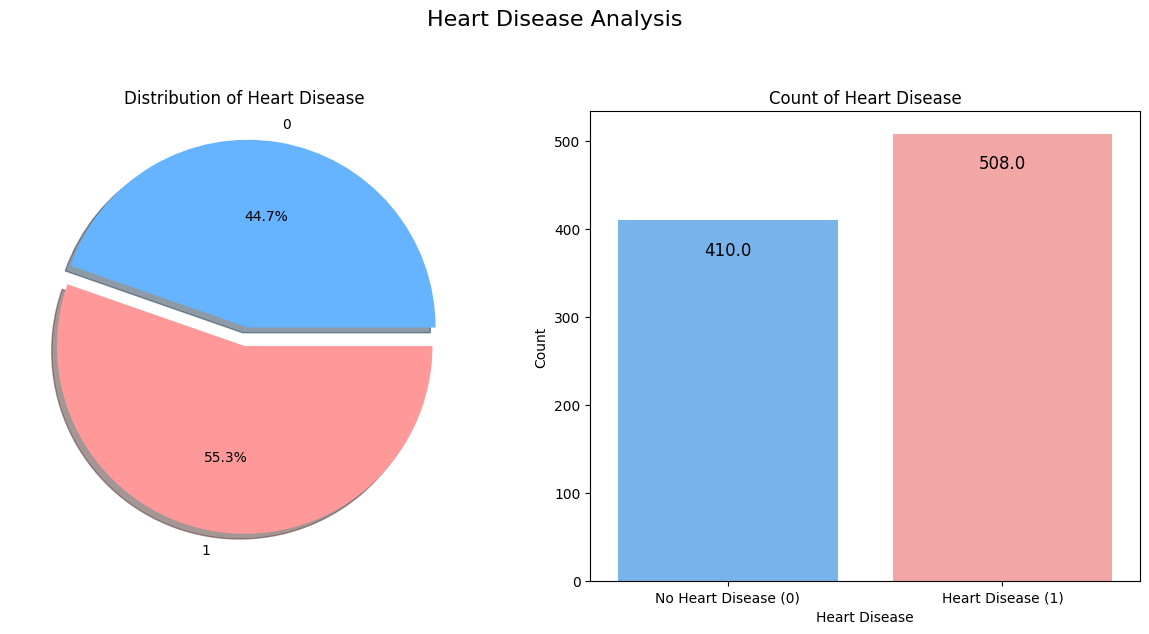

In [6]:


fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# membuat dictionary untuk warna
colors = {0: '#66b3ff', 1: '#ff9999'}

# Pie chart
explode = (0.1, 0)
df['HeartDisease'].value_counts().sort_index().plot(
    kind='pie',
    autopct='%1.1f%%',
    ax=axs[0],
    explode=explode,
    shadow=True,
    colors=[colors[0], colors[1]]
)
axs[0].set_title('Distribution of Heart Disease')
axs[0].set_ylabel('')

# Count plot
ax = sns.countplot(x='HeartDisease', data=df, ax=axs[1], palette=[colors[0], colors[1]])
ax.set_title('Count of Heart Disease')
ax.set_xlabel('Heart Disease')
ax.set_ylabel('Count')
ax.set_xticklabels(['No Heart Disease (0)', 'Heart Disease (1)'])

# membuat anotasi pada bar plot
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='top', color='black', fontsize=12)

# judul
fig.suptitle('Heart Disease Analysis', fontsize=16, y=1.05)

plt.tight_layout()
plt.show()


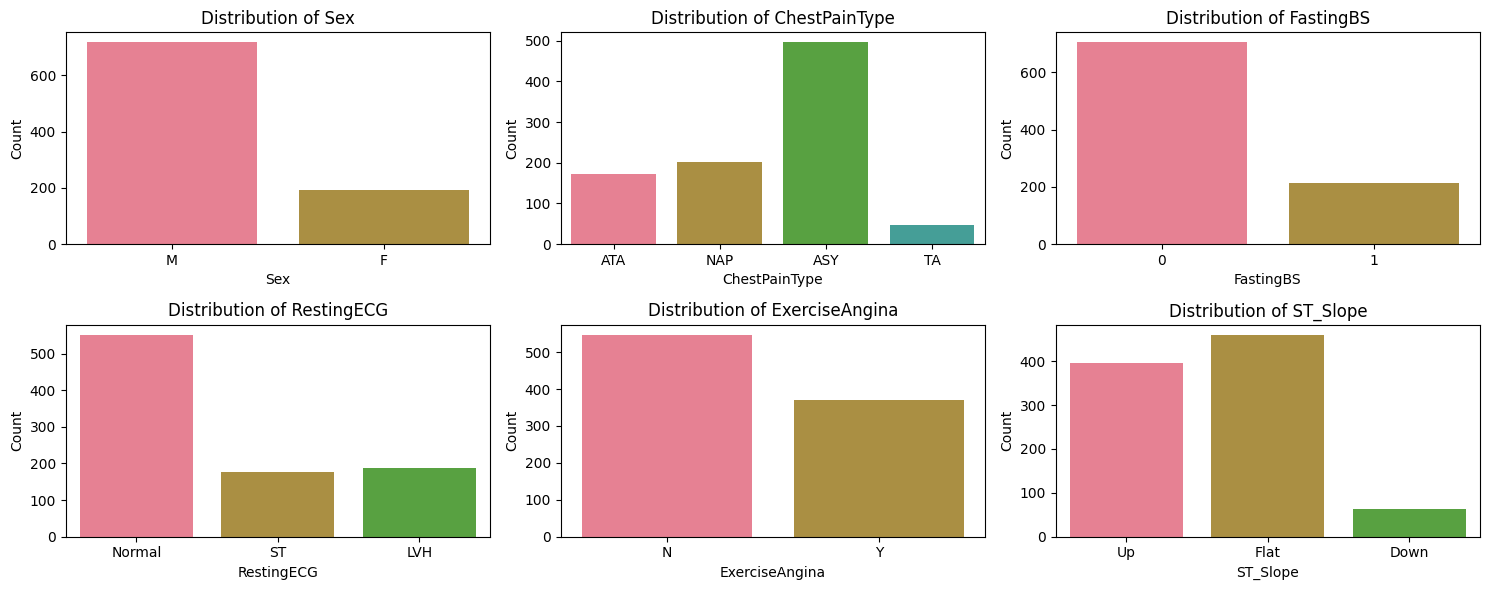

In [7]:
def countplot(data):
    num_rows = 2
    num_cols = 3
    total_plots = num_rows * num_cols

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 3 * num_rows))
    axes = axes.flatten()

    # Create a color palette with as many colors as there are columns
    palette = sns.color_palette("husl", len(data.columns))

    for i, column in enumerate(data.columns):
        sns.countplot(x=column, data=data, hue=column, ax=axes[i], palette=palette, legend=False)
        axes[i].set_title(f"Distribution of {column}")
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Count')

    # Remove any unused axes
    for j in range(i + 1, total_plots):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Assuming df is your DataFrame and you have selected the categorical columns
column_count = df[['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']]

countplot(column_count)


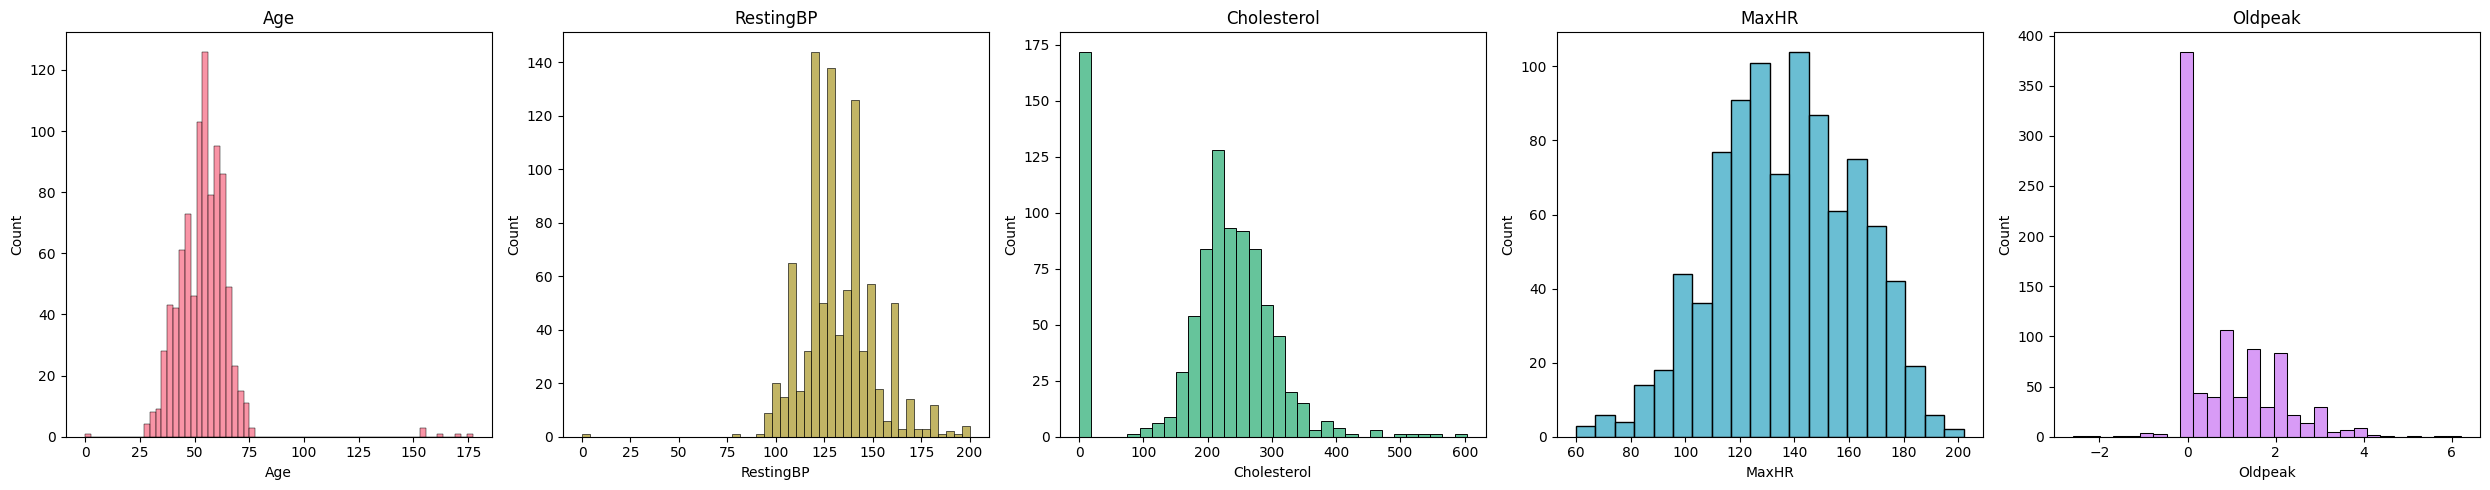

In [8]:


def histogramgraph(data):
    num_columns = len(data.columns)

    # buat warna
    palette = sns.color_palette("husl", num_columns)

    fig, axes = plt.subplots(1, num_columns, figsize=(5 * num_columns, 5))

    # Jika hanya ada 1 kolom, maka axes tidak akan berbentuk array
    if num_columns == 1:
        axes = [axes]

    for i, column in enumerate(data.columns):
        sns.histplot(data=data[column], ax=axes[i], color=palette[i])
        axes[i].set_title(f"{column}")

    plt.tight_layout()
    plt.show()

# Memilih kolom yang bertipe numerik
numeric_df = df[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']]

histogramgraph(numeric_df)


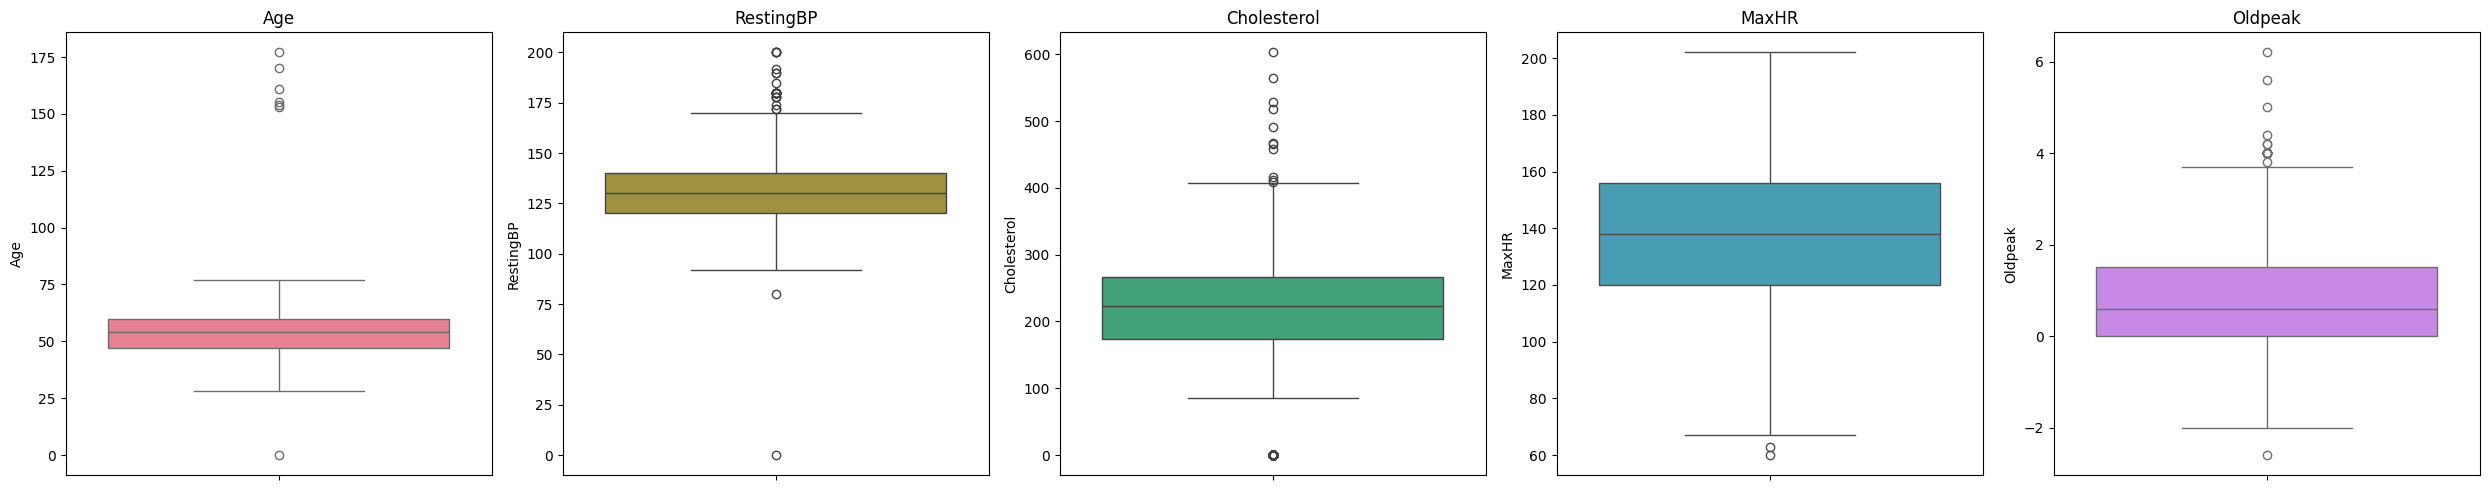

In [9]:

def cek_outliers_boxplot(data):
    num_columns = len(data.columns)

    # Buat warna
    palette = sns.color_palette("husl", num_columns)

    fig, axes = plt.subplots(1, num_columns, figsize=(5 * num_columns, 5))

    # Jika hanya ada 1 kolom, maka axes tidak akan berbentuk array
    if num_columns == 1:
        axes = [axes]

    for i, column in enumerate(data.columns):
        sns.boxplot(data=data[column], ax=axes[i], color=palette[i])
        axes[i].set_title(f"{column}")

    plt.tight_layout()
    plt.show()

# Memilih kolom yang bertipe numerik
numeric_df = df[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']]

cek_outliers_boxplot(numeric_df)


# Data Cleaning dan Preprocessing

In [10]:


# Batas atas dan batas bawah
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# outliers
def show_outliers(df, column, lower_bound, upper_bound):
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"Outliers di kolom {column}:")
    print(outliers[column].to_string(index=False))

# Mendeteksi dan menampilkan outliers untuk setiap kolom
for column in numeric_df.columns:
    lower_bound, upper_bound = detect_outliers_iqr(df, column)
    print(f"Batas bawah untuk kolom {column}: {lower_bound}")
    print(f"Batas atas untuk kolom {column}: {upper_bound}")
    show_outliers(df, column, lower_bound, upper_bound)

Batas bawah untuk kolom Age: 27.5
Batas atas untuk kolom Age: 79.5
Outliers di kolom Age:
155.0
  0.0
161.0
177.0
153.0
170.0
154.0
Batas bawah untuk kolom RestingBP: 90.0
Batas atas untuk kolom RestingBP: 170.0
Outliers di kolom RestingBP:
190
180
180
180
200
180
180
180
 80
200
185
200
180
180
  0
178
172
180
190
174
178
180
200
192
178
180
180
172
Batas bawah untuk kolom Cholesterol: 32.625
Batas atas untuk kolom Cholesterol: 407.625
Outliers di kolom Cholesterol:
468
518
412
529
466
603
491
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0


## Penanganan Outlier

In [11]:
# Menghitung nilai 0 di setiap kolom
for column in numeric_df.columns:
  print(f'{column} :',(df[column]==0).sum())

Age : 1
RestingBP : 1
Cholesterol : 172
MaxHR : 0
Oldpeak : 368


In [12]:
# Mengganti nilai 0 dengan median pada kolom
kol = df[['Age','RestingBP', 'Cholesterol']]
for column in kol.columns:
    median = df[column][df[column] != 0].median()  # Menghitung median, tidak termasuk nilai 0
    df[column] = df[column].replace({0 : median})


In [13]:
# Menghitung nilai 0 di setiap kolom
for column in numeric_df.columns:
  print(f'{column} :',(df[column]==0).sum())

Age : 0
RestingBP : 0
Cholesterol : 0
MaxHR : 0
Oldpeak : 368


In [14]:
# Menangani outliers pada kolom Age
med = df['Age'].median()
df['Age'] = df['Age'].apply(lambda x: med if x >= 150 else x)

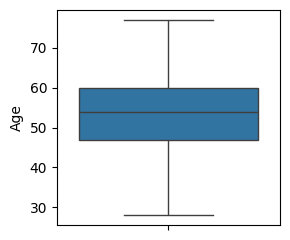

In [15]:
plt.figure(figsize=(3, 2.5))
sns.boxplot(data=df['Age'])

plt.tight_layout()
plt.show()


In [16]:
# Menangani outliers (nilai negatif) kolom oldpeak
df['Oldpeak'] = df['Oldpeak'].abs()


In [17]:
print(df[df['Oldpeak']<0])

Empty DataFrame
Columns: [Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope, HeartDisease]
Index: []


In [18]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,911.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.452250,132.538126,243.204793,0.233115,136.809368,0.915251,0.553377
std,9.393689,17.990127,53.401297,0.423046,25.460334,1.042712,0.497414
min,28.000000,80.000000,85.000000,0.000000,60.000000,0.000000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,237.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [19]:
df.duplicated().sum()

0

In [20]:
df.isna().sum()

Age                7
Sex               10
ChestPainType      0
RestingBP          0
Cholesterol        0
FastingBS          0
RestingECG         0
MaxHR              0
ExerciseAngina     0
Oldpeak            0
ST_Slope           0
HeartDisease       0
dtype: int64

In [21]:
# Menangani missing value
df['Age'].fillna(df['Age'].median(), inplace=True) # Menggunakan median
df['Sex'].fillna(df['Sex'].mode()[0], inplace=True) # Menggunakan modus

In [22]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [23]:
# Mengetahui variasi kategori yang ada di setiap kolom kategorikal
kategorical_df = df.select_dtypes(include=['object'])
for i in kategorical_df.columns:
  print(f"{i}: {kategorical_df[i].unique()}", '\n')

Sex: ['M' 'F'] 

ChestPainType: ['ATA' 'NAP' 'ASY' 'TA'] 

RestingECG: ['Normal' 'ST' 'LVH'] 

ExerciseAngina: ['N' 'Y'] 

ST_Slope: ['Up' 'Flat' 'Down'] 



1. **Age**: Usia pasien dalam tahun
2. **Sex**: Jenis kelamin pasien
   - F: Perempuan
   - M: Laki-laki
3. **ChestPainType**: Jenis nyeri dada yang dialami pasien
   - TA: Typical Angina
   - ATA: Atypical Angina
   - NAP: Nyeri Non-Angina
   - ASY: Tanpa gejala
4. **Resting BP**: Tekanan darah istirahat pasien (mm Hg)
5. **Cholesterol**: Kadar kolesterol [mm/dl]
6. **FastingBS**: Kadar gula darah puasa pasien (mg/dl)
   - 1: jika FastingBS > 120 mg/dl
   - 0: sebaliknya
7. **RestingECG**: Hasil elektrokardiogram istirahat
   - Normal: Normal
   - ST: Kelainan gelombang ST-T (T inversi gelombang dan/atau elevasi ST atau depresi > 0,05 mV)
   - LVH: Ventrikel kiri mungkin atau pasti hipertrofi menurut kriteria Estes
8. **MaxHR**: Denyut jantung maksimum yang dicapai pasien [Nilai numerik antara 60 dan 202]
9. **ExerciseAngina**: Adanya angina akibat olahraga pada pasien
   - Y: Yes
   - N: Tidak
10. **Oldpeak**: ST depression yang diukur dalam depresi
11. **ST_Slope**: Kemiringan puncak segmen ST saat olahraga
   - Up: Menanjak
   - Flat: Datar
   - Down: Miring
12. **HeartDisease**: Adanya penyakit jantung
    - 0: Normal
    - 1: Penyakit jantung


In [24]:
# Encoding
df['Sex'] = df['Sex'].replace(['M','F'],[0, 1])
df['ChestPainType'] = df['ChestPainType'].replace([ 'ASY', 'NAP', 'ATA', 'TA'],[0, 1, 2, 3])
df['RestingECG'] = df['RestingECG'].replace(['Normal', 'ST', 'LVH'],[0, 1, 2])
df['ExerciseAngina'] = df['ExerciseAngina'].replace(['N', 'Y'],[0, 1])
df['ST_Slope'] = df['ST_Slope'].replace(['Up', 'Flat', 'Down'],[0, 1, 2])

In [25]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,54.0,0,2,140,289,0,0,172,0,0.0,0,0
1,49.0,1,1,160,180,0,0,156,0,1.0,1,1
2,37.0,0,2,130,283,0,1,98,0,0.0,0,0
3,48.0,1,0,138,214,0,0,108,1,1.5,1,1
4,54.0,0,1,150,195,0,0,122,0,0.0,0,0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    float64
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 86.2 KB


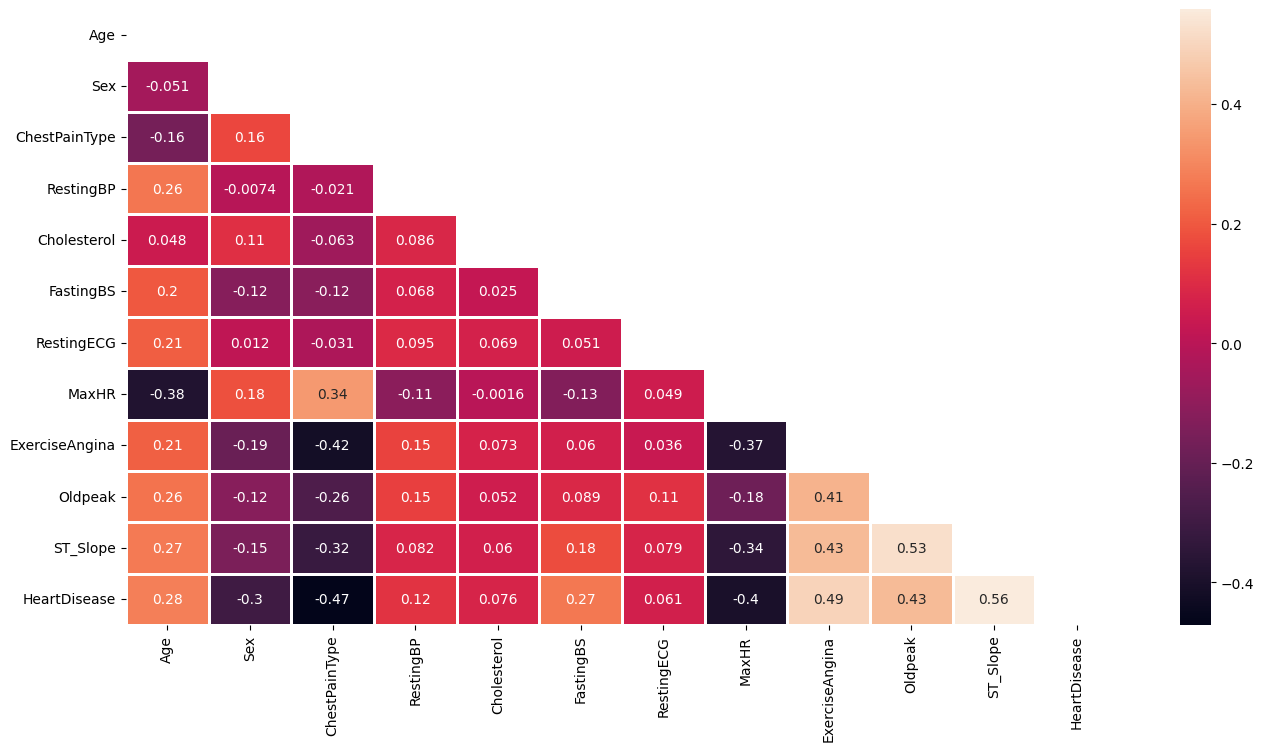

In [27]:
#Correlation matrix

plt.figure(figsize = (16, 8))

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, mask = mask, annot = True, fmt = '.2g', linewidths = 1)
plt.show()

Korelasi positif menunjukkan bahwa seiring dengan peningkatan satu variabel, variabel lain
cenderung meningkat. Sedangkan korelasi negatif menunjukkan bahwa seiring dengan
peningkatan satu variabel, variabel lain cenderung menurun. Korelasi dengan nilai absolut lebih
besar menunjukkan hubungan yang lebih kuat antara dua variabel.

In [28]:
#memeriksa varians
df.var()

Age                 87.570073
Sex                  0.164951
ChestPainType        0.866818
RestingBP          323.644673
Cholesterol       2851.698472
FastingBS            0.178968
RestingECG           0.649584
MaxHR              648.228614
ExerciseAngina       0.241073
Oldpeak              1.087248
ST_Slope             0.368517
HeartDisease         0.247420
dtype: float64

ada perbedaan yang sangat besar, jadi lebih baik dinormalisasi agar distribusi data menjadi lebih seragam.

## Normalisasi

In [29]:
from sklearn.preprocessing import StandardScaler
numeric_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [30]:
#memeriksa varians
df.var()

Age               1.001091
Sex               0.164951
ChestPainType     0.866818
RestingBP         1.001091
Cholesterol       1.001091
FastingBS         0.178968
RestingECG        0.649584
MaxHR             1.001091
ExerciseAngina    0.241073
Oldpeak           1.001091
ST_Slope          0.368517
HeartDisease      0.247420
dtype: float64

In [31]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

# Modeling

In [32]:
X = df.drop(['HeartDisease'], axis=1)
y = df['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Decission Tree

In [33]:
# membuat model Decision Tree
tree_model = DecisionTreeClassifier(random_state=42)

# melakukan pelatihan model terhadap data
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

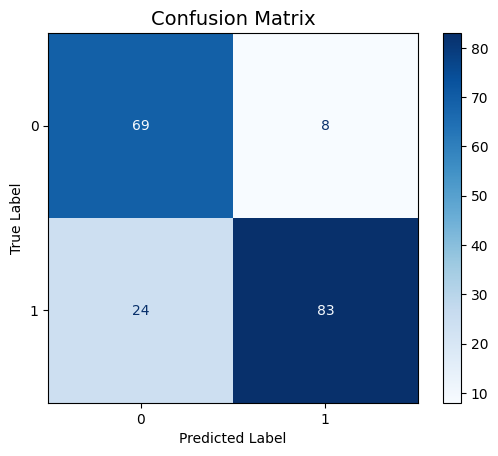

In [34]:
y_pred = tree_model.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[0, 1])

cm_display.plot(cmap='Blues')
plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [35]:
# Evaluasi model
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.90      0.74      0.81        93
           1       0.78      0.91      0.84        91

    accuracy                           0.83       184
   macro avg       0.84      0.83      0.83       184
weighted avg       0.84      0.83      0.82       184



           Feature  Importance
10        ST_Slope    0.407734
7            MaxHR    0.094086
4      Cholesterol    0.089467
3        RestingBP    0.087230
9          Oldpeak    0.074100
2    ChestPainType    0.065328
0              Age    0.063311
8   ExerciseAngina    0.053954
1              Sex    0.035152
5        FastingBS    0.016241
6       RestingECG    0.013397


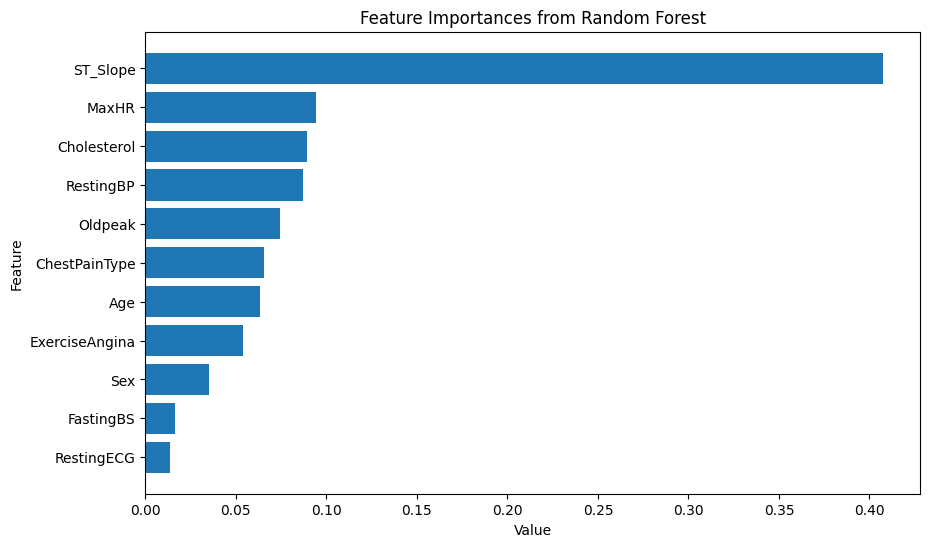

In [36]:
importances = tree_model.feature_importances_
feature_names = X.columns

feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Menampilkan feature importances
print(feature_importances)

# Visualisasi feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Value')
plt.ylabel('Feature')
plt.title('Feature Importances from Random Forest')
plt.gca().invert_yaxis()
plt.show()

In [37]:
from sklearn.model_selection import GridSearchCV

grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : range(2, 32, 1),
    'min_samples_leaf' : range(1, 10, 1),
    'min_samples_split' : range(2, 10, 1),
    'splitter' : ['best', 'random']
}

grid_search = GridSearchCV(tree_model, grid_params, cv = 10, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 8640 candidates, totalling 86400 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']},
             verbose=1)

In [38]:
grid_search.best_score_

0.8582562014068863

In [39]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 3,
 'min_samples_split': 9,
 'splitter': 'random'}

In [40]:
tree_model = DecisionTreeClassifier(criterion= 'gini', max_depth= 4, min_samples_leaf= 3, min_samples_split= 9, splitter= 'random')
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=3, min_samples_split=9,
                       splitter='random')

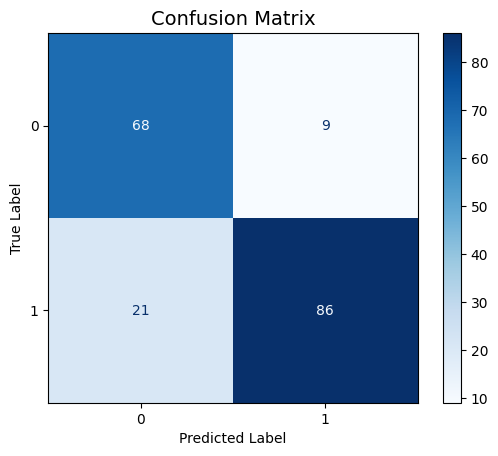

In [41]:
y_pred = tree_model.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[0, 1])

cm_display.plot(cmap='Blues')
plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [42]:
# Evaluasi model
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.88      0.76      0.82        89
           1       0.80      0.91      0.85        95

    accuracy                           0.84       184
   macro avg       0.84      0.83      0.84       184
weighted avg       0.84      0.84      0.84       184



           Feature  Importance
10        ST_Slope    0.683426
8   ExerciseAngina    0.080377
2    ChestPainType    0.075176
1              Sex    0.061865
9          Oldpeak    0.038210
5        FastingBS    0.028637
7            MaxHR    0.022848
6       RestingECG    0.005791
4      Cholesterol    0.003670
0              Age    0.000000
3        RestingBP    0.000000


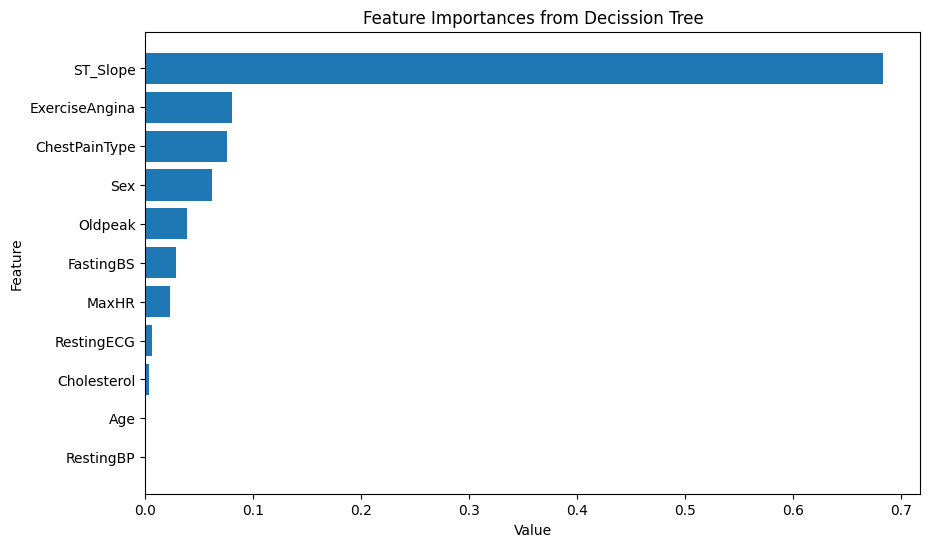

In [43]:
importances = tree_model.feature_importances_
feature_names = X.columns

feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Menampilkan feature importances
print(feature_importances)

# Visualisasi feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Value')
plt.ylabel('Feature')
plt.title('Feature Importances from Decission Tree')
plt.gca().invert_yaxis()
plt.show()

## Random Forest

In [44]:
# Membuat instance RandomForestClassifier dengan 150 pohon
forest_model = RandomForestClassifier(n_estimators=150, random_state=42)

# Melatih model dengan data pelatihan
forest_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150, random_state=42)

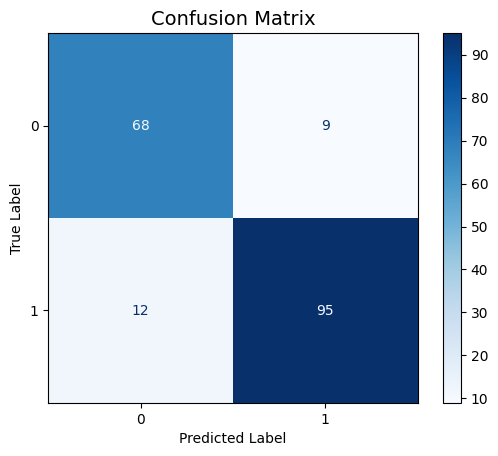

In [45]:
y_pred = forest_model.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[0, 1])

cm_display.plot(cmap='Blues')
plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [46]:
# Evaluasi model
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        80
           1       0.89      0.91      0.90       104

    accuracy                           0.89       184
   macro avg       0.89      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



           Feature  Importance
10        ST_Slope    0.242056
9          Oldpeak    0.128458
8   ExerciseAngina    0.103882
2    ChestPainType    0.103814
7            MaxHR    0.100855
0              Age    0.089499
4      Cholesterol    0.081696
3        RestingBP    0.066559
1              Sex    0.034010
5        FastingBS    0.024916
6       RestingECG    0.024256


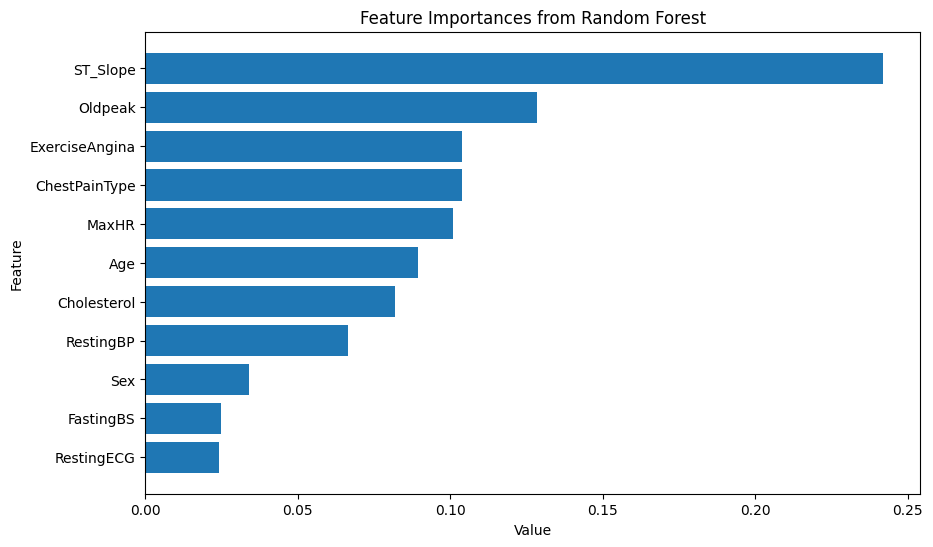

In [47]:
importances = forest_model.feature_importances_
feature_names = X.columns

feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Menampilkan feature importances
print(feature_importances)

# Visualisasi feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Value')
plt.ylabel('Feature')
plt.title('Feature Importances from Random Forest')
plt.gca().invert_yaxis()
plt.show()

## GradientBoosting

In [48]:
from sklearn.ensemble import GradientBoostingClassifier
gbc_model = GradientBoostingClassifier()
gbc_model = GradientBoostingClassifier(learning_rate = 0.05, n_estimators = 180)

# Melatih model dengan data pelatihan
gbc_model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.05, n_estimators=180)

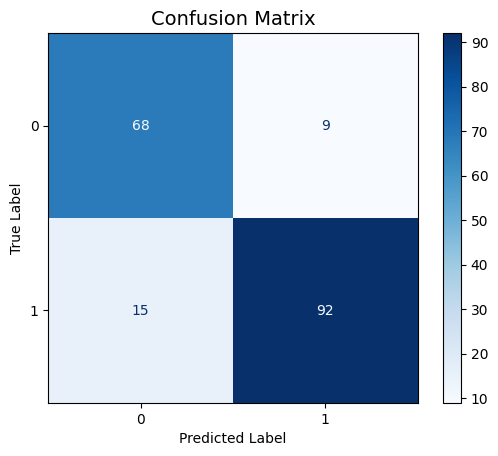

In [49]:
y_pred = gbc_model.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[0, 1])

cm_display.plot(cmap='Blues')
plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [50]:
# Evaluasi model
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85        83
           1       0.86      0.91      0.88       101

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



           Feature  Importance
10        ST_Slope    0.482801
9          Oldpeak    0.107177
2    ChestPainType    0.093916
8   ExerciseAngina    0.070149
7            MaxHR    0.062991
1              Sex    0.047045
4      Cholesterol    0.042711
0              Age    0.037304
3        RestingBP    0.029661
5        FastingBS    0.021534
6       RestingECG    0.004710


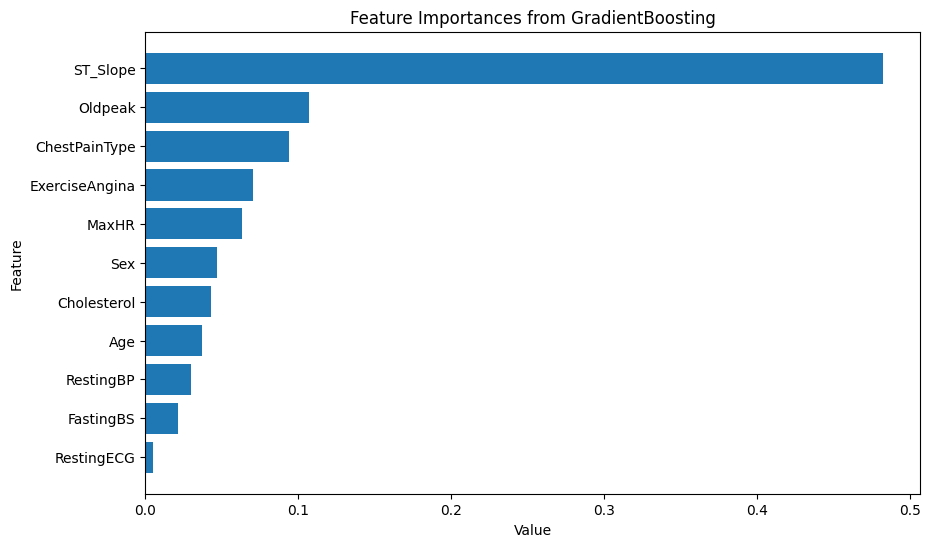

In [51]:
importances = gbc_model.feature_importances_
feature_names = X.columns

feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Menampilkan feature importances
print(feature_importances)

# Visualisasi feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Value')
plt.ylabel('Feature')
plt.title('Feature Importances from GradientBoosting')
plt.gca().invert_yaxis()
plt.show()

## XGBoost

In [52]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.01, max_depth = 5, n_estimators = 180)

# Melatih model dengan data pelatihan
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=180, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

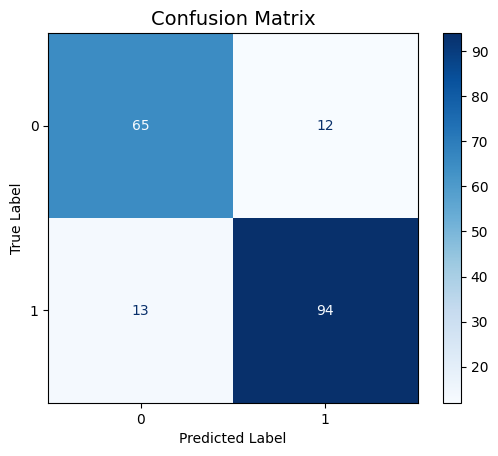

In [53]:
y_pred = xgb_model.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[0, 1])

cm_display.plot(cmap='Blues')
plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [54]:
# Evaluasi model
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84        78
           1       0.88      0.89      0.88       106

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



           Feature  Importance
10        ST_Slope    0.657723
8   ExerciseAngina    0.075211
2    ChestPainType    0.072723
1              Sex    0.055359
9          Oldpeak    0.039960
7            MaxHR    0.017589
0              Age    0.017549
6       RestingECG    0.017546
3        RestingBP    0.016208
5        FastingBS    0.015765
4      Cholesterol    0.014366


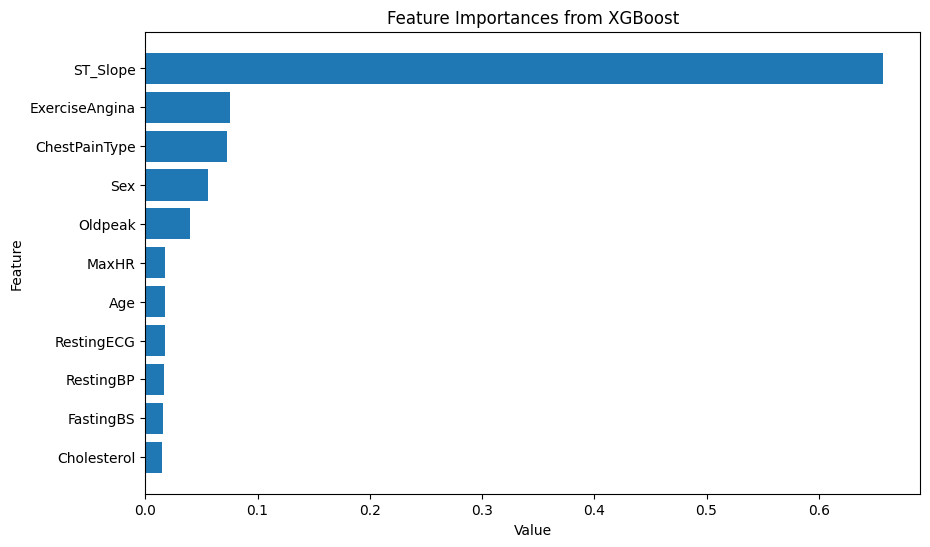

In [55]:
importances = xgb_model.feature_importances_
feature_names = X.columns

feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Menampilkan feature importances
print(feature_importances)

# Visualisasi feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Value')
plt.ylabel('Feature')
plt.title('Feature Importances from XGBoost')
plt.gca().invert_yaxis()
plt.show()

               Model  Accuracy  Precision    Recall  F1-score   ROC-AUC
0      Decision Tree  0.836957   0.905263  0.803738  0.851485  0.843428
1      Random Forest  0.885870   0.913462  0.887850  0.900474  0.885484
2  Gradient Boosting  0.869565   0.910891  0.859813  0.884615  0.871465
3            XGBoost  0.864130   0.886792  0.878505  0.882629  0.861330


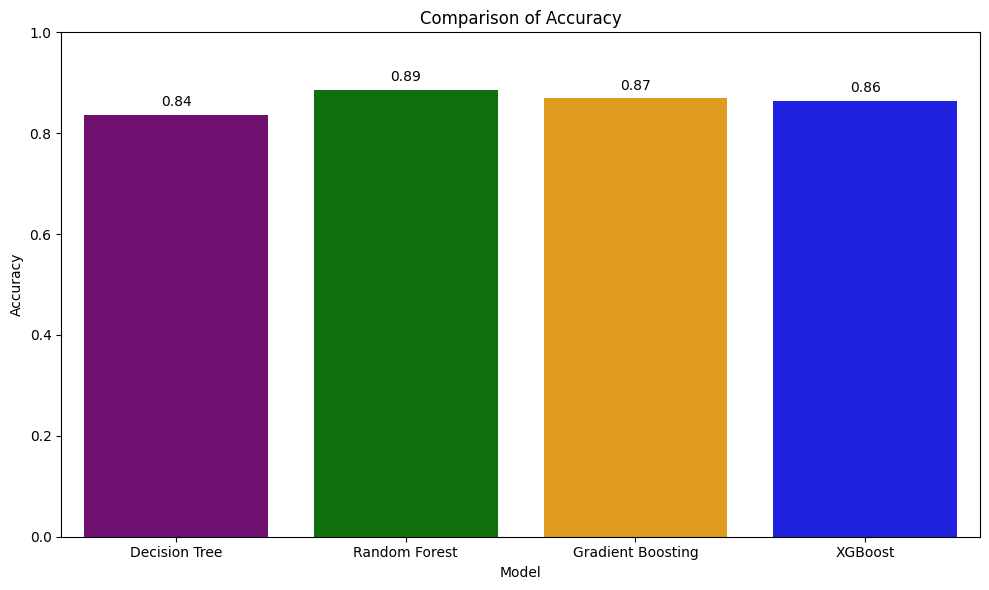

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Fungsi untuk menghitung metrik evaluasi
def evaluate_model(y_test, y_pred, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    return {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'ROC-AUC': roc_auc
    }

# Mengumpulkan metrik evaluasi untuk setiap model
models = {
    'Decision Tree': tree_model,
    'Random Forest': forest_model,
    'Gradient Boosting': gbc_model,
    'XGBoost': xgb_model
}

evaluation_results = []

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    evaluation_results.append(evaluate_model(y_test, y_pred, model_name))

# Membuat DataFrame untuk perbandingan
evaluation_df = pd.DataFrame(evaluation_results)

# Menampilkan hasil evaluasi
print(evaluation_df)

# Daftar warna untuk setiap model
colors = ['purple', 'green', 'orange', 'blue', 'black']

# Visualisasi metrik evaluasi dengan barplot hanya untuk Accuracy
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Model', y='Accuracy', data=evaluation_df, palette=colors)

# Menambahkan angka akurasi di atas batang
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 9),  # Jarak vertikal teks dari batang
                     textcoords = 'offset points')

plt.title('Comparison of Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Menyelaraskan skala y-axis antara 0 dan 1
plt.tight_layout()
plt.show()


# Kesimpulan

Berdasarkan analisis data penyakit jantung yang dilakukan, dapat disimpulkan bahwa dataset ini mengandung berbagai fitur yang relevan seperti usia, jenis kelamin, tekanan darah, dan lainnya yang berpotensi mempengaruhi keberadaan penyakit jantung. Proses eksplorasi data menunjukkan distribusi variabel target yang seimbang, dengan lebih dari separuh pasien dalam dataset ini memiliki penyakit jantung. Selain itu, penggunaan beberapa model Machine Learning seperti Decision Tree, Random Forest, dan Gradient Boosting mampu memberikan prediksi yang cukup baik terhadap keberadaan penyakit jantung berdasarkan fitur-fitur yang disediakan. Evaluasi model menggunakan confusion matrix dan laporan klasifikasi mengungkapkan performa yang cukup memuaskan, meskipun ada potensi untuk peningkatan melalui penyetelan lebih lanjut atau penambahan fitur. Analisis ini memberikan wawasan yang berharga dalam pemahaman lebih dalam terhadap faktor-faktor yang dapat mempengaruhi risiko penyakit jantung dalam dataset yang digunakan.